# Core Algorithms

## Linear regression - Titanic Dataset

### Analysing the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')

#Moves column 'survived' to y_train directly
y_train = train.pop('survived')
y_test = test.pop('survived')

In [3]:
train

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y
...,...,...,...,...,...,...,...,...,...
622,male,28.0,0,0,10.5000,Second,unknown,Southampton,y
623,male,25.0,0,0,7.0500,Third,unknown,Southampton,y
624,female,19.0,0,0,30.0000,First,B,Southampton,y
625,female,28.0,1,2,23.4500,Third,unknown,Southampton,n


<Axes: >

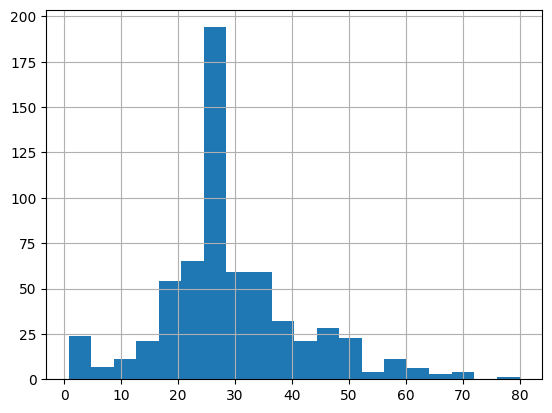

In [4]:
#dataset.column.hist(bins = no of bars needed)
train.age.hist(bins=20)

#Majority passengers are males, 25-30 years of age

<Axes: ylabel='sex'>

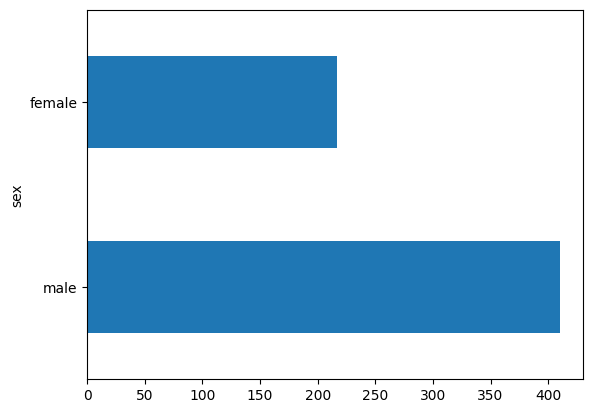

In [5]:
# Horizontal bar plot for classified values
train.sex.value_counts().plot(kind='barh')

['Southampton' 'Cherbourg' 'Queenstown' 'unknown']


<Axes: ylabel='count'>

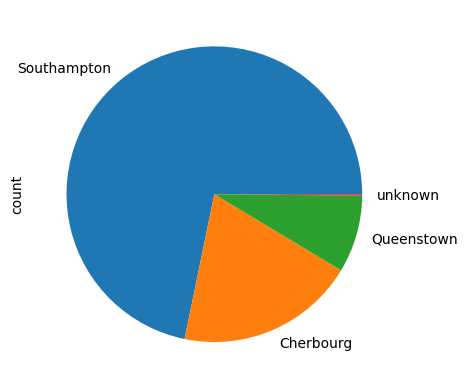

In [6]:
print(train.embark_town.unique())
train.embark_town.value_counts().plot(kind='pie')

<Axes: ylabel='class'>

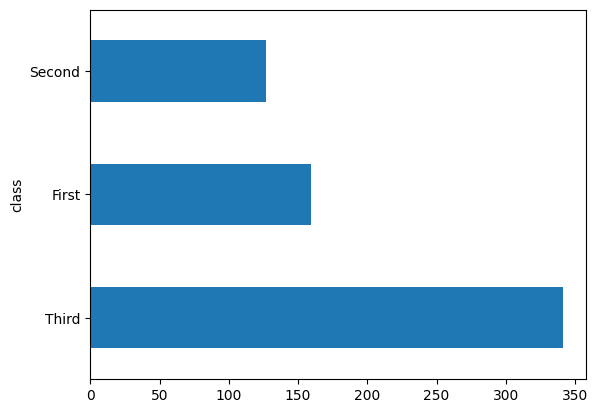

In [7]:
train['class'].value_counts().plot(kind = 'barh')

sex
female    0.778802
male      0.180488
Name: survived, dtype: float64

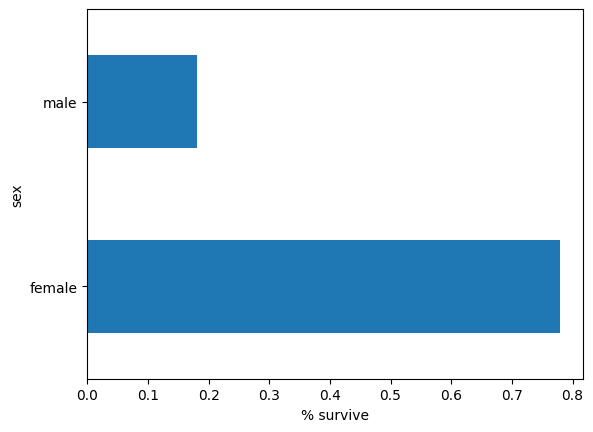

In [8]:
pd.concat([train,y_train],axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive')
pd.concat([train,y_train],axis=1).groupby('sex').survived.mean()

<!-- # Majority of passengers are male, age: 20-30s, third class.
# Chances of survival of females is higher -->

### Creating the feature columns for the model

In [9]:
columns = train.columns.to_numpy()     #array(['sex', 'age', 'n_siblings_spouses', 'parch', 'fare', 'class', 'deck', 'embark_town', 'alone'], dtype=object)
categorial_columns = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck', 'embark_town', 'alone']
numeric_columns = ['age','fare']
feature_columns = []

for feature in categorial_columns:
    vocab = train[feature].unique()               #gets the unique values in the columns
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature,vocab))
    
for feature in numeric_columns:
    feature_columns.append(tf.feature_column.numeric_column(feature))

print(feature_columns)

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.
Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.
[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', 

### Input function
We classify the data into batches called Epochs and then pass it batchwise so that the model sees the same type of data many times and learns to predict it.
The input function needs data in form of $\textbf{tf.data.Dataset}$ object and not as pandas so convert that.

In [10]:
def make_input_fn(data_df, label_df, epochs = 10, shuffle = True, batch_size=32):
    def input_fn():
        ds = tf.data.Dataset.from_tensor_slices((dict(data_df),label_df))    #transforms pandas dataframe to tf.data.Dataset using input parameters and the y-labels.
        if shuffle:
            ds = ds.shuffle(1000)                                             #shuffles the data set
        ds = ds.batch(batch_size).repeat(epochs)                              #splits dataset into batches and repeats the process epoch no of times
        return ds
    return input_fn                                                           #returns the function object itself

In [11]:
train_input_fn = make_input_fn(train, y_train)                            #trains the data set
eval_input_fn = make_input_fn(test, y_test, epochs=1, shuffle = False)    #passing test data so no need to shuffle or have mult epochs

### Creating the model

In [12]:
lin_est = tf.estimator.LinearClassifier(feature_columns = feature_columns)     #estimator is the basic implementation of algos

Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\NIKSHA~1\\AppData\\Local\\Temp\\tmp2a8iwftd', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', 

### Training and evaluating the model

In [13]:
lin_est.train(train_input_fn)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Done calling model_fn.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Create CheckpointSaverHook.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\NIKSHA~1\AppData\Loca

In [14]:
result = lin_est.evaluate(eval_input_fn)
result

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2023-06-22T18:37:56
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\NIKSHA~1\AppData\Local\Temp\tmp2a8iwftd\model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 1.35714s
INFO:tensorflow:Finished evaluation at 2023-06-22-18:37:58
INFO:tensorflow:Saving dict for global step 200: accuracy = 0.7462121, accuracy_baseline = 0.625, auc = 0.83437407, auc_precision_recall = 0.79232705, average_loss = 0.48261467, global_step = 200, label/mean = 0.375, loss = 0.47557735, precision = 0.6509434, prediction/mean = 0.42106405, recall = 0.6969697
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 200: C:\Users\NIKSHA~1\AppData\Local\Temp\tmp2a8iwftd\model.ckpt-200


{'accuracy': 0.7462121,
 'accuracy_baseline': 0.625,
 'auc': 0.83437407,
 'auc_precision_recall': 0.79232705,
 'average_loss': 0.48261467,
 'label/mean': 0.375,
 'loss': 0.47557735,
 'precision': 0.6509434,
 'prediction/mean': 0.42106405,
 'recall': 0.6969697,
 'global_step': 200}

In [15]:
print(result['accuracy'])

0.7462121


In [16]:
#Individual probabilities of a person surviving or not
indiv_result = list(lin_est.predict(eval_input_fn))

print("\nProbab Died, Probab Survived")
for person in indiv_result:
    print(person['probabilities'])

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\NIKSHA~1\AppData\Local\Temp\tmp2a8iwftd\model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.

Probab Died, Probab Survived
[0.9111909  0.08880908]
[0.51409113 0.48590884]
[0.19411887 0.8058811 ]
[0.29455277 0.70544726]
[0.6778672  0.32213274]
[0.24770291 0.7522971 ]
[0.39578992 0.60421014]
[0.88256973 0.11743033]
[0.35996273 0.6400373 ]
[0.26502725 0.7349727 ]
[0.3061449 0.6938551]
[0.8829089  0.11709117]
[0.12845068 0.8715493 ]
[0.54987603 0.45012397]
[0.13677299 0.863227  ]
[0.37270468 0.6272953 ]
[0.81150997 0.18848999]
[0.16162747 0.8383725 ]
[0.5756704  0.42432955]
[0.89978707 0.10021286]
[0.880516   0.11948404]
[0.8991968 0.1008032]


In [17]:
#Checking the results for a random person
print(test.loc[0])
print("\nProbability of survival", indiv_result[0]['probabilities'][1])
print("Actual case of survival", y_test[0])

sex                          male
age                          35.0
n_siblings_spouses              0
parch                           0
fare                         8.05
class                       Third
deck                      unknown
embark_town           Southampton
alone                           y
Name: 0, dtype: object

Probability of survival 0.08880908
Actual case of survival 0
